# SECOND POINT

We will to improve our results by building different CNN with different characteristics. We perform data augmentation in order to have more data to train my network

In [1]:
import os
import glob
import scipy
import cv2 as cv2
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import pandas as pd

from keras import optimizers, initializers
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.utils import plot_model
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import import_ipynb
import dataSetUtility as dsu
import plottingUtility as pltu

importing Jupyter notebook from dataSetUtility.ipynb
importing Jupyter notebook from plottingUtility.ipynb


# DATA AUGMENTATION

To improve the results we try to increase the number of data following a transformation from left to right. To do this we use a method from the dataSetUtility.

In [2]:
#path to the directories
pathTrain=r'C:\Users\adria\Desktop\CVPR\ImageSet\train'
pathTest=r'C:\Users\adria\Desktop\CVPR\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  15
Class names:  ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


In [3]:
xTrainAug, yTrainAug = dsu.dataAugmentation(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)
print("Train len: ", len(xTrainAug))
print("Train label len: ", len(yTrainAug))
print("---------------------------------")
print("Test len: ", len(xTest))
print("Test label len: ", len(yTest))

Train len:  3000
Train label len:  3000
---------------------------------
Test len:  2985
Test label len:  2985


In [4]:
yTrainCategorical = to_categorical(yTrainAug)
yTestCategorical = to_categorical(yTest)

In [5]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainAug, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  2550
len Validation Set:  450
len Test Set:  2985


# CNN MODEL

Initially we try to apply the data augmentation to the cnn of point one

In [6]:
sgd = ks.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [7]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
80/80 [==============================] - 3s 32ms/step - loss: 2.7077 - accuracy: 0.0720 - val_loss: 2.7034 - val_accuracy: 0.0978
Epoch 2/100
80/80 [==============================] - 2s 19ms/step - loss: 2.6966 - accuracy: 0.1136 - val_loss: 2.6866 - val_accuracy: 0.1089
Epoch 3/100
80/80 [==============================] - 2s 20ms/step - loss: 2.6372 - accuracy: 0.1242 - val_loss: 2.5691 - val_accuracy: 0.1511
Epoch 4/100
80/80 [==============================] - 2s 20ms/step - loss: 2.5456 - accuracy: 0.1686 - val_loss: 2.4708 - val_accuracy: 0.1867
Epoch 5/100
80/80 [==============================] - 1s 18ms/step - loss: 2.4416 - accuracy: 0.2017 - val_loss: 2.4022 - val_accuracy: 0.2111
Epoch 6/100
80/80 [==============================] - 2s 20ms/step - loss: 2.3391 - accuracy: 0.2406 - val_loss: 2.2064 - val_accuracy: 0.3022
Epoch 7/100
80/80 [==============================] - 1s 18ms/step - loss: 2.1389 - accuracy: 0.2957 - val_loss: 2.0007 - val_accuracy: 0.3067
Epoch 

In [8]:
baseModel.evaluate(xTest, yTestCategorical)

prediction = baseModel.predict(xTest) 
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

94/94 [==============================] - 1s 6ms/step - loss: 3.7439 - accuracy: 0.3983


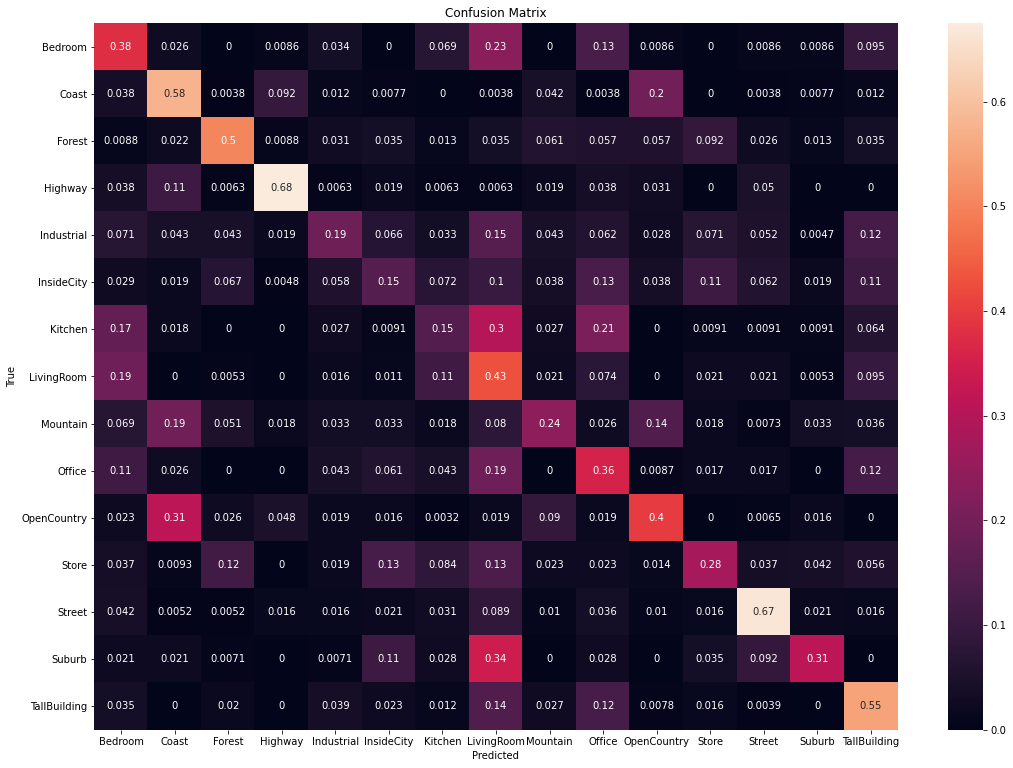

In [9]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

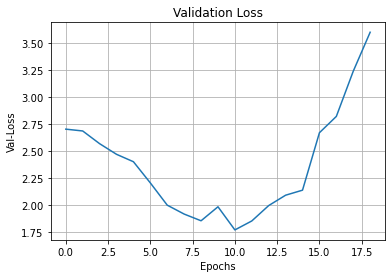

In [10]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

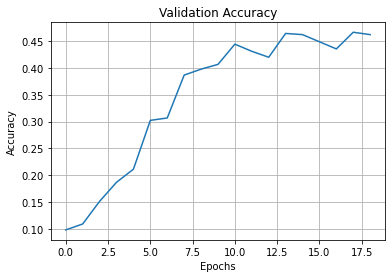

In [11]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

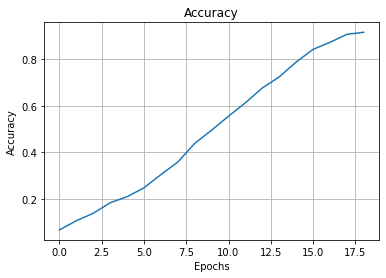

In [12]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

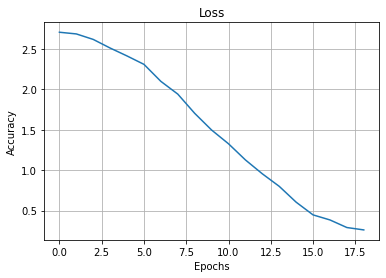

In [13]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [14]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.21      0.38      0.27       116
       Coast       0.43      0.58      0.49       260
      Forest       0.59      0.50      0.54       228
     Highway       0.66      0.68      0.67       160
  Industrial       0.36      0.19      0.25       211
  InsideCity       0.23      0.15      0.18       208
     Kitchen       0.14      0.15      0.14       110
  LivingRoom       0.21      0.43      0.28       189
    Mountain       0.41      0.24      0.30       274
      Office       0.19      0.36      0.25       115
 OpenCountry       0.49      0.40      0.44       310
       Store       0.42      0.28      0.34       215
      Street       0.64      0.67      0.65       192
      Suburb       0.52      0.31      0.39       141
TallBuilding       0.51      0.55      0.53       256

    accuracy                           0.40      2985
   macro avg       0.40      0.39      0.38      2985
weig

With the data augmentation alone we get an accuracy of about 0.44. Now let's try to use a BatchNormalization, add a Dropout, change the CNN structure trying to reach an accuracy of about 0.60

# Batch Normalization

To use tf.keras.layers.BatchNormalization you need to use set the axis you are considering. By default this has value -1 and must be an integer.
To improve regularization we also add dropout layers (tf.keras.layers.Dropout) to CNNs.

In [15]:
adam = optimizers.Adam()
print("Create CNN with kernel size = 3")
modelAdam3x3 = Sequential([
    Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam3x3.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 5")
modelAdam5x5 = Sequential([
    Conv2D(filters=8,kernel_size=5,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam5x5.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 7")
modelAdam7x7 = Sequential([
    Conv2D(filters=8,kernel_size=7,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])

modelAdam7x7.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

Create CNN with kernel size = 3
Create CNN with kernel size = 5
Create CNN with kernel size = 7


In [16]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

print("Fit Adam Model with kernel size = 3")
historyAdam3=modelAdam3x3.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 5")
historyAdam5=modelAdam5x5.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 7")
historyAdam7=modelAdam7x7.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Fit Adam Model with kernel size = 3
Epoch 1/100
80/80 [==============================] - 4s 46ms/step - loss: 2.6995 - accuracy: 0.1250 - val_loss: 2.7932 - val_accuracy: 0.0956
Epoch 2/100
80/80 [==============================] - 3s 42ms/step - loss: 2.3562 - accuracy: 0.2402 - val_loss: 3.2975 - val_accuracy: 0.1378
Epoch 3/100
80/80 [==============================] - 3s 42ms/step - loss: 2.1538 - accuracy: 0.3699 - val_loss: 3.9502 - val_accuracy: 0.1244
Epoch 4/100
80/80 [==============================] - 3s 43ms/step - loss: 1.9377 - accuracy: 0.4389 - val_loss: 3.4628 - val_accuracy: 0.1422
Epoch 5/100
80/80 [==============================] - 4s 44ms/step - loss: 1.8042 - accuracy: 0.4880 - val_loss: 3.3979 - val_accuracy: 0.1644
Epoch 6/100
80/80 [==============================] - 4s 44ms/step - loss: 1.6242 - accuracy: 0.5210 - val_loss: 2.4106 - val_accuracy: 0.2467
Epoch 7/100
80/80 [==============================] - 3s 42ms/step - loss: 1.4513 - accuracy: 0.6002 - val_loss: 

Epoch 6/100
80/80 [==============================] - 4s 53ms/step - loss: 2.1703 - accuracy: 0.3037 - val_loss: 2.8605 - val_accuracy: 0.0867
Epoch 7/100
80/80 [==============================] - 4s 51ms/step - loss: 2.0770 - accuracy: 0.3337 - val_loss: 2.5328 - val_accuracy: 0.1933
Epoch 8/100
80/80 [==============================] - 4s 51ms/step - loss: 1.9806 - accuracy: 0.3644 - val_loss: 2.6719 - val_accuracy: 0.1556
Epoch 9/100
80/80 [==============================] - 4s 52ms/step - loss: 1.8994 - accuracy: 0.3766 - val_loss: 2.1897 - val_accuracy: 0.2800
Epoch 10/100
80/80 [==============================] - 4s 52ms/step - loss: 1.8219 - accuracy: 0.3985 - val_loss: 2.1686 - val_accuracy: 0.3067
Epoch 11/100
80/80 [==============================] - 4s 51ms/step - loss: 1.7192 - accuracy: 0.4404 - val_loss: 2.4165 - val_accuracy: 0.3022
Epoch 12/100
80/80 [==============================] - 4s 51ms/step - loss: 1.6569 - accuracy: 0.4573 - val_loss: 1.8957 - val_accuracy: 0.3644
Epo

In [17]:
modelAdam3x3.evaluate(xTest, yTestCategorical)
modelAdam5x5.evaluate(xTest, yTestCategorical)
modelAdam7x7.evaluate(xTest, yTestCategorical)

predictionAdam3 = modelAdam3x3.predict(xTest)
predictionAdam5 = modelAdam5x5.predict(xTest)
predictionAdam7 = modelAdam7x7.predict(xTest)

yPredAdam3 = dsu.predictClass(predictionAdam3)
yPredAdam5 = dsu.predictClass(predictionAdam5)
yPredAdam7 = dsu.predictClass(predictionAdam7)

94/94 [==============================] - 1s 12ms/step - loss: 1.8090 - accuracy: 0.4492


In [18]:
cmAdam3 = confusion_matrix(yTest, yPredAdam3)
cmAdam5 = confusion_matrix(yTest, yPredAdam5)
cmAdam7 = confusion_matrix(yTest, yPredAdam7)

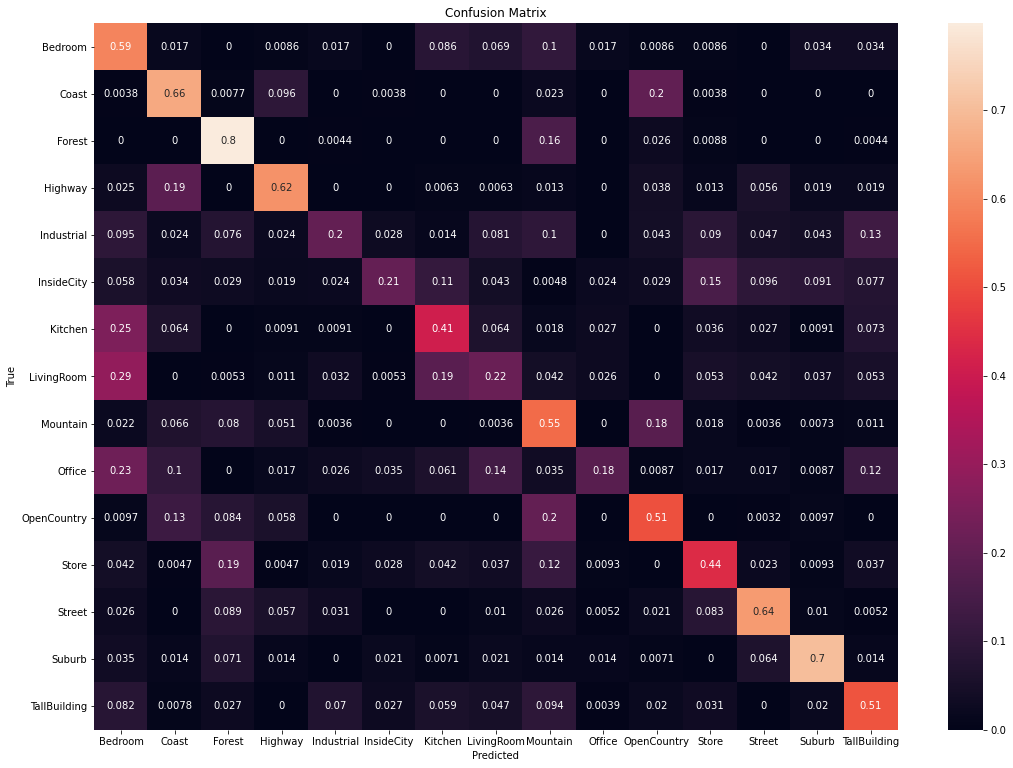

In [19]:
pltu.plotConfusionMatrix(cmAdam3, labels, "confusion_matrix_augmentation_adam_3", "images_point_two/")

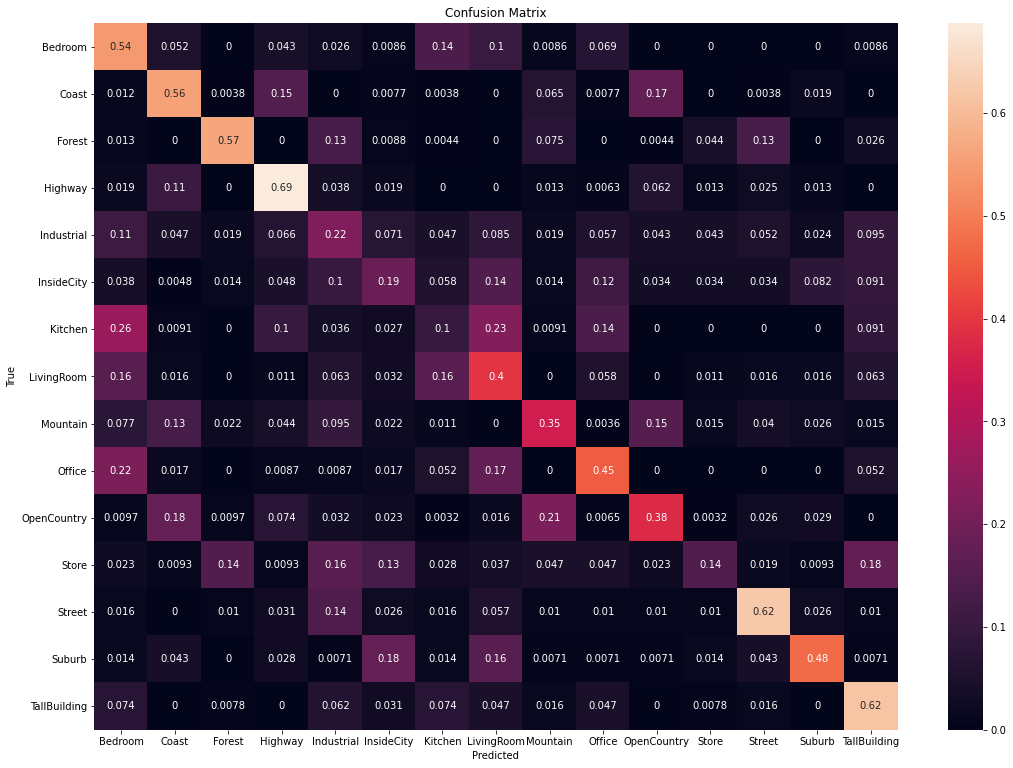

In [20]:
pltu.plotConfusionMatrix(cmAdam5, labels, "confusion_matrix_augmentation_adam_5", "images_point_two/")

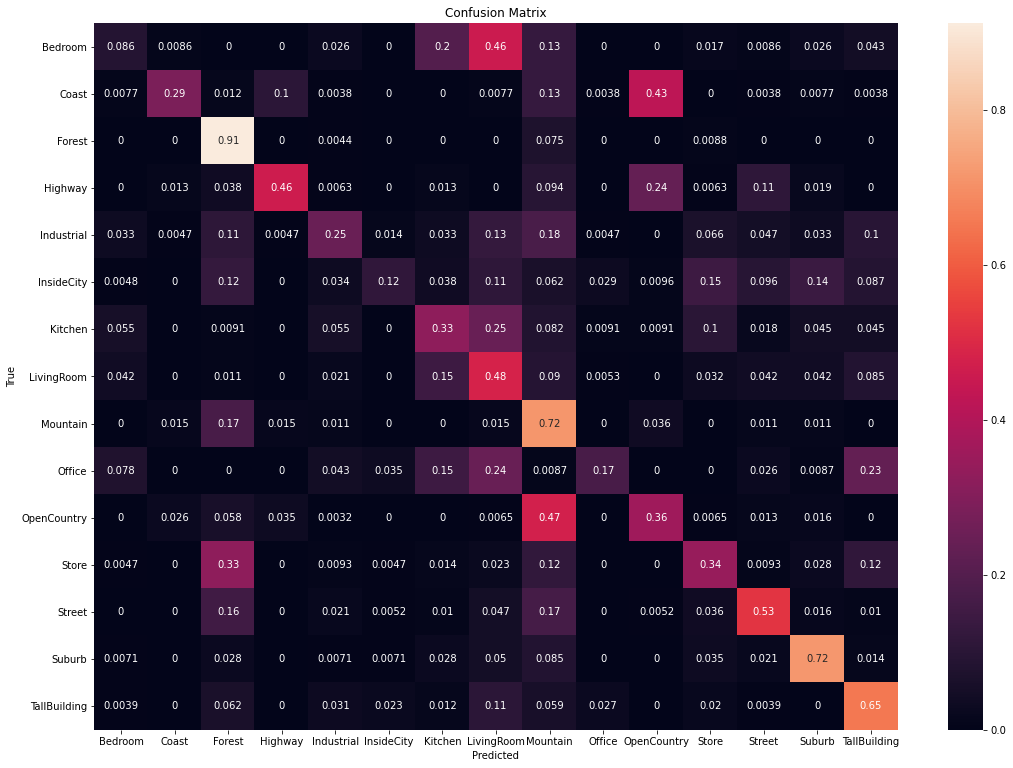

In [21]:
pltu.plotConfusionMatrix(cmAdam7, labels, "confusion_matrix_augmentation_adam_7", "images_point_two/")

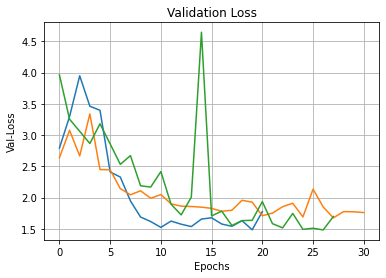

In [22]:
pltu.validationLoss(historyAdam3, "images_point_two", "validation_loss_adam_3")
pltu.validationLoss(historyAdam5, "images_point_two", "validation_loss_adam_5")
pltu.validationLoss(historyAdam7, "images_point_two", "validation_loss_adam_7")

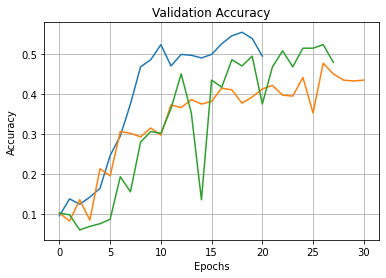

In [23]:
pltu.validationAccuracy(historyAdam3, "images_point_two", "validation_acc_3")
pltu.validationAccuracy(historyAdam5, "images_point_two", "validation_acc_5")
pltu.validationAccuracy(historyAdam7, "images_point_two", "validation_acc_7")

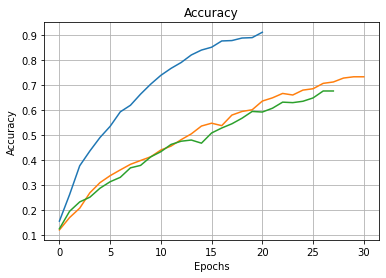

In [24]:
pltu.plottingAccuracy(historyAdam3, "images_point_two", "accuracy_3")
pltu.plottingAccuracy(historyAdam5, "images_point_two", "accuracy_5")
pltu.plottingAccuracy(historyAdam7, "images_point_two", "accuracy_7")

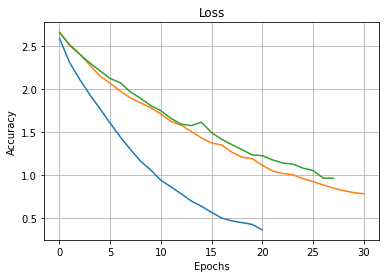

In [25]:
pltu.plottingLoss(historyAdam3, "images_point_two", "loss_1")
pltu.plottingLoss(historyAdam5, "images_point_two", "loss_3")
pltu.plottingLoss(historyAdam7, "images_point_two", "loss_7")